In [ ]:
# I imported the dataset from the Kaggle website

In [231]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from matplotlib import pyplot
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

#Directives
np.random.seed(2)
plt.style.use('ggplot')
%matplotlib inline
#variables
path = 'AgeDataset-V1.csv'
sep = ','
random_state = 40

In [232]:
#Read the file
#Use `df` as data frame name
df = pd.read_csv(path , delimiter = sep)

In [233]:
df1 = df.sample(frac = 0.05, random_state = random_state)
df1

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
168756,Q1452719,Frederick Deacon,chess master,Male,United Kingdom of Great Britain and Ireland,Athlete,1829,1875.0,NaN,46.0
195186,Q1638671,Otto Waffenschmied,"Austrian illustrator, comics artist and editor",Male,Austria,Artist,1901,1971.0,NaN,70.0
1184686,Q62604028,Arnold Ebrok,Estonian rowing coach,Male,Estonia,Athlete,1921,2011.0,NaN,90.0
724043,Q12142255,Пономаренко Григорій Якович,historicus,NaN,NaN,Researcher,1922,2009.0,NaN,87.0
1063139,Q37423098,Maria Petronella van der Klugt-Witteman,Dutch politician and mayor,Female,Kingdom of the Netherlands,Politician,1926,1997.0,NaN,71.0
...,...,...,...,...,...,...,...,...,...,...
362167,Q3849032,Mario Ridolfi,Italian architect,Male,Italy; Kingdom of Italy,Architect,1904,1984.0,NaN,80.0
572990,Q6710948,Léandre Lacroix,Luxembourgian politician (1859-1935),Male,Luxembourg,Politician,1859,1935.0,NaN,76.0
400268,Q4707747,Alan Shapley,United States Marine Corps general,Male,United States of America,Military personnel,1903,1973.0,NaN,70.0
571567,Q6687665,Louis Liebe,German composer,Male,Germany,Artist,1819,1900.0,NaN,81.0


In [234]:
print("the dataframe size are: "+str(df1.shape))

the dataframe size are: (61150, 10)


In [235]:
#Show column names
df1.columns

Index(['Id', 'Name', 'Short description', 'Gender', 'Country', 'Occupation',
       'Birth year', 'Death year', 'Manner of death', 'Age of death'],
      dtype='object')

In [236]:
#Show portion of data
df1.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
168756,Q1452719,Frederick Deacon,chess master,Male,United Kingdom of Great Britain and Ireland,Athlete,1829,1875.0,NaN,46.0
195186,Q1638671,Otto Waffenschmied,"Austrian illustrator, comics artist and editor",Male,Austria,Artist,1901,1971.0,NaN,70.0
1184686,Q62604028,Arnold Ebrok,Estonian rowing coach,Male,Estonia,Athlete,1921,2011.0,NaN,90.0
724043,Q12142255,Пономаренко Григорій Якович,historicus,NaN,NaN,Researcher,1922,2009.0,NaN,87.0
1063139,Q37423098,Maria Petronella van der Klugt-Witteman,Dutch politician and mayor,Female,Kingdom of the Netherlands,Politician,1926,1997.0,NaN,71.0


In [237]:
#Show a description of the dataframe
df1.describe()

,Birth year,Death year,Age of death
count,61150.000000,61150.000000,61150.00000
mean,1845.017367,1914.191087,69.17372
std,151.166021,154.886213,16.71984
min,-1481.000000,-1425.000000,0.00000
25%,1829.000000,1895.000000,60.00000
50%,1887.000000,1955.000000,72.00000
75%,1918.000000,1994.000000,81.00000
max,2005.000000,2021.000000,128.00000


In [238]:
#Remove the rows that contains NULL values.
df1 = df1.dropna()

In [240]:
df1["Country"].unique()

array(['United States of America', 'Russian Empire', 'France; Algeria',
       'United States of America; Italy; Kingdom of Italy',
       'Saudi Arabia', 'Morocco', 'United Kingdom',
       'Azerbaijan; Soviet Union', 'Canada', 'New Zealand',
       'Ottoman Empire', 'France', 'Spain', 'Switzerland', 'Bulgaria',
       'Argentina', 'Soviet Union', 'Kingdom of the Netherlands',
       'Germany', 'Belarus', 'Poland', 'Costa Rica', 'Ireland',
       'Austria-Hungary', 'Italy; Eritrea; Kingdom of Italy', 'Japan',
       'Canada; United States of America', 'Austria', 'Australia',
       'Soviet Union; Russian Empire', 'Norway', 'Sweden', 'Turkey',
       'Denmark', 'Hungary', 'Mexico', 'Venezuela', 'Somalia',
       'United Kingdom of Great Britain and Ireland', 'Senegal',
       'South Africa', 'Brazil', 'Kingdom of England',
       'Italy; Kingdom of Italy', 'Kingdom of Italy', 'Indonesia',
       'United Kingdom; United Kingdom of Great Britain and Ireland',
       'Cuba', 'Kingdom of G

In [228]:
df1[df1["Country"]=='United States of America; Italy; Kingdom of Italy']

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
358622,Q3809178,Jon D'Agostino,Italian-American comic-book artist,Male,United States of America; Italy; Kingdom of Italy,Artist,1929,2010.0,natural causes,81.0


In [247]:
df1['Country'] = df1['Country'].replace(['France; Algeria', 'Morocco', 'Angola', 'Italy; Eritrea; Kingdom of Italy',
                                         'Somalia','Senegal', 'South Africa', 'Tunisia', 'Nigeria', 'Lebanon; Syria',
                                         'Ethiopia','Namibia','Belgium; South Africa','Eritrea', 'Ghana', 'Syria',
                                         'Burundi','Egypt', 'Ancient Egypt', 'Uganda', 'Equatorial Guinea', 'Ptolemaic Kingdom'], 'Africa')

df1['Country'] = df1['Country'].replace(['Estonia', 'Austria', 'Belgium', 'Kingdom of the Netherlands', 'Russian Empire',
                                         'United Kingdom of Great Britain and Ireland', 'Luxembourg', 'Germany',
                                         'Kingdom of Italy' , 'Kingdom of France', 'Spain', 'France', 'Italy',
                                         'German Empire', 'Kingdom of England', 'Republic of Florence','United Kingdom', 'Sweden',
                                         'Norway', 'Holy Roman Empire', 'Kingdom of Portuga', 'Papal States', 
                                          'German Democratic Republic', 'Kingdom of Great Britain', 'Kingdom of Prussia',
                                          'Austria-Hungary', 'Azerbaijan; Soviet Union', 'Ottoman Empire',
                                          'Switzerland', 'Bulgaria', 'Soviet Union', 'Belarus', 'Poland',
                                          'Ireland','Austria-Hungary', 'Italy; Eritrea; Kingdom of Italy',
                                          'Soviet Union; Russian Empire', 'Turkey','Denmark', 'Hungary',
                                         'Italy; Kingdom of Italy', 'Kingdom of Italy', 
                                          'United Kingdom; United Kingdom of Great Britain and Ireland', 'Republic of Genova', 'Russia; Soviet Union',
                                         'Albania; Ottoman Empire','Grand Duchy of Lithuania; Polish–Lithuanian Commonwealth',
                                          'United States of America; France', 'United States of America; Poland',
                                          'Socialist Federal Republic of Yugoslavia', 
                                         'India; British Raj', 'Spain; Equatorial Guinea', 
                                         'Slovenia; Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia',
                                         'Crown of Castile','Spain; Italy; Kingdom of Italy', 'Ukraine; Soviet Union','Montenegro',
                                          'Soviet Union; Russian Empire; Russian Soviet Federative Socialist Republic',
                                          'Slovakia', 'Romania', 'Poland; New Zealand', 'Czech Republic', 'German Democratic Republic',
                                          'Czechoslovakia', 'France; Gabon', 'Albania', 'Luxembourg', 'England',
                                         'Poland; Mandatory Palestine', 'Palestine; Russian Empire; Mandatory Palestine', 'Wales',
                                         'Soviet Union; Lokot Autonomy; Russian Soviet Federative Socialist Republic',
                                         'Netherlands', 'Israel', 'Ukraine', 'Soviet Union; Russian Empire; Far Eastern Republic; Russian Soviet Federative Socialist Republic',
                                          'Palestine', 'Germany; German Democratic Republic',
                                         'Suriname; Kingdom of the Netherlands', 'France; Iceland', 'United States of America; Austria; Germany', 'Finland',
                                          'England; United Kingdom of Great Britain and Ireland','Ireland; United States of America', 'British Raj',
                                          'Sweden; Somalia','Russia; Soviet Union; Russian Empire; Russian Soviet Federative Socialist Republic',
                                          'Spain; Cuba', "People's Republic of Hungary; Kingdom of Hungary", 'North Macedonia',
                                         'United Kingdom; Australia', 'Croatia; Yugoslavia', 'Byzantine Empire','Denmark; Russian Empire', 'ancient Rome',
                                         'Belgium; France','United Kingdom; Irish Free State; United Kingdom of Great Britain and Ireland',
                                          'Belgium; South Africa', 'Iceland','Austria; German Reich', 
                                         'Switzerland; Kingdom of the Netherlands; Alemania', 'Grand Duchy of Tuscany',
                                         'Spain; El Salvador', 'United States of America; Switzerland', 'Wales; United Kingdom of Great Britain and Ireland',
                                         'Kingdom of Romania','Grand Duchy of Hesse; Russian Empire','Austria; Nazi Germany; Austria-Hungary',
                                         'Socialist Federal Republic of Yugoslavia; Kingdom of Yugoslavia; Federal Republic of Yugoslavia',
                                          'Poland; Russian Empire', 'United States of America; Kingdom of Italy', 'United States of America; Germany',
                                         'United States of America; Italy; Kingdom of Italy','Greece', 'France; Israel','Russia', 
                                         'Serbia', 'United States of America; United Kingdom', 'Kingdom of Great Britain; United Kingdom of Great Britain and Ireland',
                                         'Serbia; Serbia and Montenegro; Socialist Federal Republic of Yugoslavia; Federal Republic of Yugoslavia',
                                          'Hungary; Austria','Hungary; Austria','Wales; United Kingdom', 'France; West Germany', 'Turkey; Germany', 
                                          'France; West Germany', 'Turkey; Germany', 'Duchy of Milan', 'Russia; Germany', 'France; United Kingdom',
                                          'United States of America; Austria; Austria-Hungary', 'Nazi Germany; Weimar Republic; German Empire',
                                          'Russian Empire; Second Polish Republic', 'Western Han Dynasty', 'Canada; United Kingdom; United Kingdom of Great Britain and Ireland',
                                          'Wales; United Kingdom; United Kingdom of Great Britain and Ireland','Greece; Russian Empire', 'Austria; Slovakia',
                                          'Switzerland; France','Nazi Germany; German Empire; West Germany',"Ukraine; Soviet Union; Austria-Hungary; Ukrainian Soviet Socialist Republic; Ukrainian People's Republic",
                                          'Ottoman Empire; Yugoslavia','Australia; United Kingdom of Great Britain and Ireland','Latvia; Soviet Union', 
                                          'United States of America; Russian Empire','Austria-Hungary; Czechoslovakia', 'Kingdom of Naples', 
                                         'Kingdom of Great Britain; Kingdom of Scotland', 'Canada; Poland', 'Duchy of Brittany', 'France; Germany',
                                          'United States of America; Kingdom of Hungary','United States of America; Austria', 'Ireland; United Kingdom of Great Britain and Ireland',
                                         'United States of America; Austria-Hungary', 'Grenada',"People's Republic of Poland",'Russian Soviet Federative Socialist Republic; Russian Empire', 
                                         'Hungary; United States of America','France; Romania; Austria-Hungary','Second Polish Republic',
                                         'United States of America; Sweden','Soviet Union; Russian Empire; Democratic Republic of Georgia',
                                          'Spain; France','Soviet Union; Russian Soviet Federative Socialist Republic','United Kingdom; India',
                                         'Germany; Nazi Germany; West Germany', 'Latvia','Nazi Germany; German Empire','Prussia','Kingdom of Ireland', 
                                         'Bulgaria; Ottoman Empire','Republic of Venice','Kingdom of Jerusalem',
                                         'United States of America; United Kingdom of Great Britain and Ireland', 
                                         'France; Brazil', 'Germany; Nazi Germany; Weimar Republic', 'State of Palestine',
                                          'Poland; Nazi Germany; Russian Empire','Kingdom of Yugoslavia'], 'Europe')


<ipython-input-247-457fae5c2d57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Country'] = df1['Country'].replace(['France; Algeria', 'Morocco', 'Angola', 'Italy; Eritrea; Kingdom of Italy',
<ipython-input-247-457fae5c2d57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Country'] = df1['Country'].replace(['Estonia', 'Austria', 'Belgium', 'Kingdom of the Netherlands', 'Russian Empire',


In [248]:
df1["Country"].unique()

array(['United States of America', 'Europe', 'Africa', 'Saudi Arabia',
       'Canada', 'New Zealand', 'Argentina', 'Costa Rica', 'Japan',
       'Canada; United States of America', 'Australia', 'Mexico',
       'Venezuela', 'Brazil', 'Indonesia', 'Cuba', 'Chile', 'India',
       'Mexicans', 'Iran', 'Malaysia', 'Tang Empire', 'Uruguay',
       'Philippines', 'Iraq; statelessness',
       'Bolivia; Viceroyalty of the Río de la Plata', 'Tanzania', 'Iraq',
       'Dominican Republic', 'Canada; Philippines', 'Mexico; Cuba',
       'El Salvador', 'Qing dynasty; Ming dynasty', 'Tonkin',
       'Qing dynasty; Republic of China (1912–1949)',
       'Western Jin dynasty', 'Malawi', 'Umayyad Caliphate', 'Colombia',
       'United States of America; Puerto Rico', 'Ecuador',
       'San Nicolás de los Garza', "People's Republic of China", 'Yemen',
       'South Korea',
       "People's Republic of China; Republic of China (1912–1949)",
       'Guatemala', 'Americans', 'Taiwan',
       "People's Re

In [216]:
#I replace countries with geographical areas

df1["Country"]= df1["Country"].map({'Estonia': 'Europe',
                                    'Austria': 'Europe',
                                    'Belgium': 'Europe',
                                    'Kingdom of the Netherlands' : 'Europe',
                                    'Russian Empire' : 'Europe',
                                    'United Kingdom of Great Britain and Ireland' : 'Europe',
                                    'Luxembourg' : 'Europe',
                                    'Germany' : 'Europe',
                                    'Kingdom of Italy' : 'Europe',
                                    'Kingdom of France' : 'Europe',
                                    'Spain': 'Europe',
                                    'France' : 'Europe',
                                    'Italy' : 'Europe',
                                    'German Empire' : 'Europe',
                                    'Kingdom of England' : 'Europe',
                                    'Republic of Florence' : 'Europe',
                                    'United Kingdom': 'Europe',
                                    'Sweden' : 'Europe',
                                    'Norway' : 'Europe',
                                    'Holy Roman Empire' : 'Europe',
                                    'Kingdom of Portuga' : 'Europe',
                                    'Papal States' : 'Europe',
                                    'German Democratic Republic' : 'Europe',
                                    'Kingdom of Great Britain' : 'Europe',
                                    'Kingdom of Prussia' : 'Europe',
                                    'Austria-Hungary' : 'Europe'}, na_action = None)

<ipython-input-216-f6f86e65d0fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Country"]= df1["Country"].map({'Estonia': 'Europe',


In [217]:
df1["Country"].unique()

array([nan, 'Europe'], dtype=object)

In [103]:
df1[df1["Country"]=='Libya']

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death


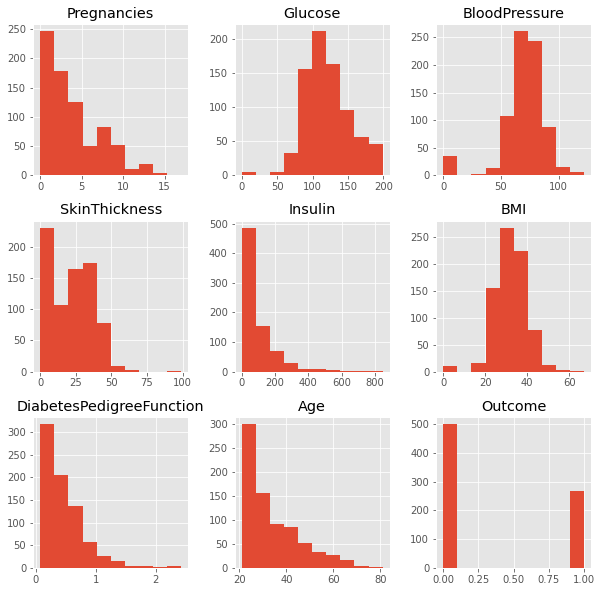

In [29]:
#Show histograms for all numeric values
pd.DataFrame.hist(df, figsize = [10,10]);

In [30]:
##Show a description of the dataframe based on the attribute 'Age of death'
df['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [31]:
#Print information about the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


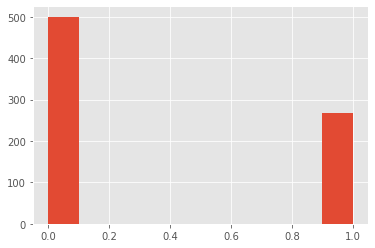

In [32]:
##Show histograms for the attribute 'Age of death'
plt.hist(df['Outcome'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

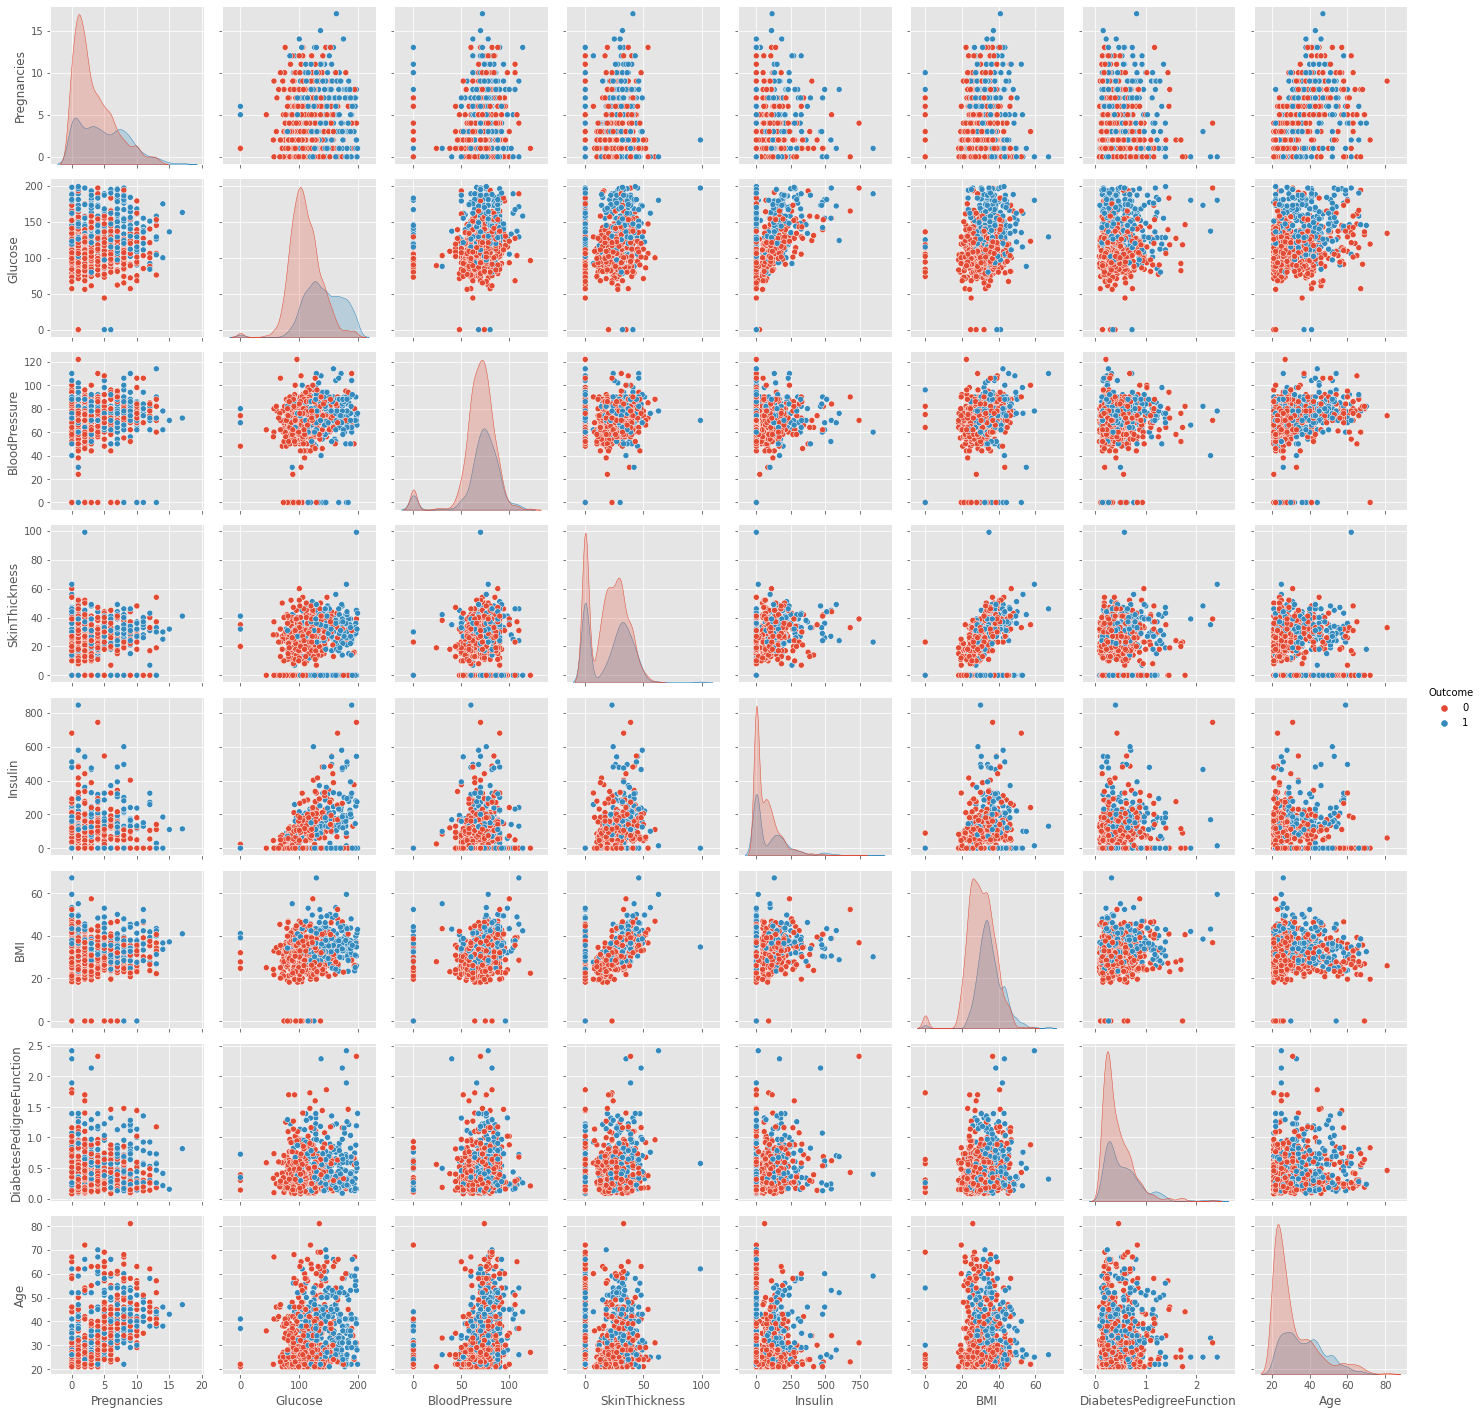

In [34]:
#Show a plot of pairs of numeric attributes
sns.pairplot(df, hue = 'Outcome', diag_kws={'bw':0.2})

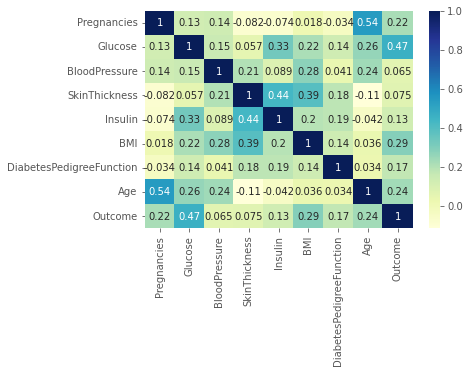

In [35]:
#Calculate the relationship between each column in the data set.
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

# ***Find the best classification scheme using three classification methods***

I will use Decision Trees, Linear Perceptron and K-nearest Neighbors.

In [ ]:
#Let's start by dividing our data into the feature matrix and the class labels

In [36]:
X = df.drop('Outcome', axis=1)
X.shape

(768, 8)

In [37]:
y = df['Outcome']
y.shape

(768,)

In [42]:
#I will now split the data into a training and a test set in order to see how well the classifiers perform

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = random_state)


In [43]:
print("There are {} samples in the training dataset".format(Xtrain.shape[0]))
print("There are {} samples in the testing dataset".format(Xtest.shape[0]))
print("Each sample has {} features".format(Xtrain.shape[1]))

There are 576 samples in the training dataset
There are 192 samples in the testing dataset
Each sample has 8 features


In [58]:
# Instantiate the DecisionTree Classifier
dt = DecisionTreeClassifier(random_state = random_state)

# Fit it to the training data
dt.fit(Xtrain, ytrain)

# Try to predict training data
dt_train_prediction = dt.predict(Xtrain)

# Try to predict test data
dt_test_prediction = dt.predict(Xtest)

# Compute the accuracy score for the predictions
dt_train_accuracy = accuracy_score(ytrain, dt_train_prediction) * 100
dt_test_accuracy = accuracy_score(ytest, dt_test_prediction) * 100

In [60]:
# Instantiate the Linear Perceptron
lp = Perceptron(random_state = random_state)

# Fit it to the training data
lp.fit(Xtrain, ytrain)

# Try to predict training data
lp_train_prediction = lp.predict(Xtrain)

# Try to predict test data
lp_test_prediction = lp.predict(Xtest)

# Compute the accuracy score for the predictions
lp_train_accuracy = accuracy_score(ytrain, lp_train_prediction) * 100
lp_test_accuracy = accuracy_score(ytest, lp_test_prediction) * 100

In [61]:
# Instantiate the KNN Classifier
knn = KNeighborsClassifier()

# Fit it to the training data
knn.fit(Xtrain, ytrain)

# Try to predict training data
knn_train_prediction = knn.predict(Xtrain)

# Try to predict test data
knn_test_prediction = knn.predict(Xtest)

# Compute the accuracy score for the predictions
knn_train_accuracy = accuracy_score(ytrain, knn_train_prediction) * 100
knn_test_accuracy = accuracy_score(ytest, knn_test_prediction) * 100

In [62]:
print(f"The decision tree had an accuracy of {dt_train_accuracy:.2f} on the training set and {dt_test_accuracy:.2f} on the test set")
print(f"The linear perceptron had an accuracy of {lp_train_accuracy:.2f} on the training set and {lp_test_accuracy:.2f} on the test set")
print(f"The knn classifier had an accuracy of {knn_train_accuracy:.2f} on the training set and {knn_test_accuracy:.2f} on the test set")

The decision tree had an accuracy of 100.00 on the training set and 70.83 on the test set
The linear perceptron had an accuracy of 57.47 on the training set and 59.90 on the test set
The knn classifier had an accuracy of 80.73 on the training set and 65.62 on the test set


The decision tree shows signs of overfitting.
The linear perceptron have a higher accuracy on the test set, compared to the training one.
The KNN classifier reaching a higher accuracy on the test set data.

# ***For each classification method find the best parameter setting with cross validation on the training set***

In [63]:
# Model labels to facilitate iterations
model_lbls = ['dt', 'lp', 'knn']

# We will evaluate classification via the precision metric
score = 'precision'

# Parameters for each classifier
tuned_param_dt = [{'max_depth': list(range(1,dt.get_depth() + 1)), 'random_state': [random_state]}]
tuned_param_lp = [{'early_stopping': [True], 'random_state': [random_state]}]
tuned_param_knn =[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]

# set the models to be fitted specifying name, estimator and parameter structure
models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(), 
           'param': tuned_param_dt,
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(),
           'param': tuned_param_lp,
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': tuned_param_knn
    }
}

In [64]:
def print_results(model):
    print("Best parameters set found on train set:")
    print()
    # if best is linear there is no gamma parameter
    print(model.best_params_)
    print()
    print("Grid scores on train set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    params = model.cv_results_['params']
    for mean, std, params_tuple in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params_tuple))
    print()
    print("Detailed classification report for the best parameter set:")
    print()
    print("The model is trained on the full train set.")
    print("The scores are computed on the full test set.")
    print()
    y_true, y_pred = ytest, model.predict(Xtest)
    print(classification_report(y_true, y_pred))
    print()

In [65]:
results_short = {}

for m in model_lbls:
    print('-'*40)
    print("Trying model {}".format(models[m]['name']))
    clf = GridSearchCV(models[m]['estimator'], models[m]['param'], cv=5,
                        scoring='%s_macro' % score,  
                        return_train_score = False,
                        n_jobs = 2,
                    )
    
    clf.fit(Xtrain, ytrain)
    print_results(clf)
    results_short[m] = clf.best_score_
    
print("Summary of results for {}".format(score))
print("Estimator")
for m in results_short.keys():
    print("{}\t - score: {:5.2f}%".format(models[m]['name'], results_short[m]*100))

----------------------------------------
Trying model Decision Tree       
Best parameters set found on train set:

{'max_depth': 1, 'random_state': 42}

Grid scores on train set:

0.741 (+/-0.102) for {'max_depth': 1, 'random_state': 42}
0.741 (+/-0.102) for {'max_depth': 2, 'random_state': 42}
0.739 (+/-0.049) for {'max_depth': 3, 'random_state': 42}
0.734 (+/-0.027) for {'max_depth': 4, 'random_state': 42}
0.717 (+/-0.040) for {'max_depth': 5, 'random_state': 42}
0.671 (+/-0.012) for {'max_depth': 6, 'random_state': 42}
0.673 (+/-0.056) for {'max_depth': 7, 'random_state': 42}
0.677 (+/-0.068) for {'max_depth': 8, 'random_state': 42}
0.662 (+/-0.047) for {'max_depth': 9, 'random_state': 42}
0.673 (+/-0.052) for {'max_depth': 10, 'random_state': 42}
0.672 (+/-0.067) for {'max_depth': 11, 'random_state': 42}
0.673 (+/-0.049) for {'max_depth': 12, 'random_state': 42}
0.667 (+/-0.054) for {'max_depth': 13, 'random_state': 42}

Detailed classification report for the best parameter set:



NameError: ignored